In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [4]:
cw = pd.read_csv('cw_full.csv')
cw.drop("Unnamed: 0", axis=1, inplace=True)
print cw.shape
cw.head()

(128101, 8)


,title,clue,date,year,answer,unique,day,answer_count
0,,"___ Nast, publisher of Vogue",December 16,2016,CONDE,False,Friday,3
1,,Baby,December 16,2016,SPOIL,False,Friday,4
2,,Voodoo doll action,December 16,2016,HEX,False,Friday,6
3,,"""Robin ___"" (old Irish ballad)",December 16,2016,ADAIR,False,Friday,4
4,,Bittersweet spread,December 16,2016,MARMALADE,False,Friday,1


In [95]:
cw_top_5000 = cw['answer'].value_counts().head(5000)
cw_top_5000

ERA                100
ORE                 88
ONE                 81
ALE                 75
SPA                 74
ALI                 74
ETA                 74
ODE                 73
AREA                73
ACE                 67
ELI                 66
ARE                 65
ALA                 64
ERE                 64
ERIE                64
OLE                 63
END                 62
IRE                 62
TEE                 60
ARIA                59
ESS                 58
APE                 58
ERR                 57
ASH                 56
ATE                 56
EEL                 55
LIE                 55
ELSE                52
ICE                 52
USE                 52
                  ... 
MENORCA              1
FAVORED              1
PEANUT               1
ZIPOUT               1
DOMS                 1
HEIFER               1
TAKENOPRISONERS      1
CHILLPILL            1
HUMANRIGHTS          1
ALPHAFEMALE          1
ASCENTOFEVEREST      1
MISSM                1
HAIRLINE   

In [96]:
cw['answer'].value_counts()

ERA                100
ORE                 88
ONE                 81
ALE                 75
SPA                 74
ALI                 74
ETA                 74
ODE                 73
AREA                73
ACE                 67
ELI                 66
ARE                 65
ALA                 64
ERE                 64
ERIE                64
OLE                 63
END                 62
IRE                 62
TEE                 60
ARIA                59
ESS                 58
APE                 58
ERR                 57
ASH                 56
ATE                 56
EEL                 55
LIE                 55
ELSE                52
ICE                 52
USE                 52
                  ... 
MENORCA              1
FAVORED              1
PEANUT               1
ZIPOUT               1
DOMS                 1
HEIFER               1
TAKENOPRISONERS      1
CHILLPILL            1
HUMANRIGHTS          1
ALPHAFEMALE          1
ASCENTOFEVEREST      1
MISSM                1
HAIRLINE   

In [7]:
top_words = pd.read_csv('Top_5000_Words.csv')
print top_words.shape
top_words.head(20)

(5000, 5)


,Rank,Word,Part of speech,Frequency,Dispersion
0,1,the,a,22038615,0.98
1,2,be,v,12545825,0.97
2,3,and,c,10741073,0.99
3,4,of,i,10343885,0.97
4,5,a,a,10144200,0.98
5,6,in,i,6996437,0.98
6,7,to,t,6332195,0.98
7,8,have,v,4303955,0.97
8,9,to,i,3856916,0.99
9,10,it,p,3872477,0.96


In [8]:

common_words = set(top_words['Word']).intersection(cw['answer'].map(lambda x: str(x).lower()))
print len(common_words)
print len(set(top_words['Word']))
print len(top_words['Word'])
print len(cw['answer'])
common_words



2423
4352
5000
128101


{'limited',
 'four',
 'protest',
 'sleep',
 'mansion',
 'captain',
 'hate',
 'whose',
 'voter',
 'electricity',
 'bike',
 'under',
 'sorry',
 'pride',
 'hormone',
 'risk',
 'blanket',
 'rise',
 'every',
 'govern',
 'affect',
 'vast',
 'school',
 'prize',
 'frozen',
 'disc',
 'red',
 'calendar',
 'enhance',
 'triumph',
 'clothes',
 'enjoy',
 'chew',
 'force',
 'tired',
 'mail',
 'direct',
 'pulse',
 'horn',
 'chef',
 'elegant',
 'second',
 'persuade',
 'theory',
 'blue',
 'admire',
 'hide',
 'selected',
 'above',
 'toll',
 'new',
 'net',
 'ever',
 'hero',
 'herb',
 'never',
 'here',
 'musical',
 'studio',
 'hers',
 'path',
 'dry',
 'substance',
 'forum',
 'auction',
 'credit',
 'mentor',
 'smoke',
 'permit',
 'golden',
 'divide',
 'straw',
 'moral',
 'glance',
 'total',
 'unit',
 'plot',
 'army',
 'sweater',
 'achieve',
 'negative',
 'call',
 'asset',
 'strike',
 'type',
 'until',
 'holy',
 'relax',
 'expose',
 'award',
 'aware',
 'warn',
 'phone',
 'warm',
 'adult',
 'prescription',
 '

In [9]:
common_words = set(top_words['Word']).intersection(cw_top_5000.index.map(lambda x: str(x).lower()))
print len(common_words)
print common_words

799
set(['essay', 'all', 'code', 'sales', 'skip', 'rod', 'alien', 'disc', 'sleep', 'per', 'skin', 'dish', 'hate', 'row', 'one', 'weed', 'leap', 'send', 'tail', 'under', 'norm', 'song', 'far', 'rise', 'fat', 'fan', 'awful', 'nerve', 'vast', 'entire', 'hour', 'tear', 'die', 'list', 'gun', 'try', 'item', 'sand', 'race', 'team', 'dip', 'chew', 'ten', 'thin', 'tea', 'isolate', 'crop', 'cash', 'nail', 'rate', 'cost', 'pour', 'pass', 'acid', 'odd', 'port', 'even', 'rope', 'sue', 'poke', 'hide', 'ugly', 'sun', 'sum', 'melt', 'cell', 'toll', 'new', 'net', 'ever', 'era', 'hero', 'leg', 'herb', 'loose', 'here', 'water', 'let', 'cart', 'cab', 'alone', 'path', 'arena', 'stair', 'host', 'trial', 'jaw', 'gene', 'via', 'elect', 'extra', 'win', 'put', 'limb', 'total', 'unit', 'plot', 'use', 'fee', 'eye', 'sake', 'two', 'next', 'few', 'live', 'asset', 'stage', 'type', 'tell', 'phone', 'teen', 'riot', 'trait', 'stable', 'award', 'aware', 'glass', 'adult', 'hole', 'editor', 'glad', 'fly', 'topic', 'none',

In [10]:
set(cw_top_5000.index.map(lambda x: str(x).lower())).difference(common_words)

{'aided',
 'ams',
 'ciao',
 'hats',
 'yenta',
 'sleek',
 'sleet',
 'andre',
 'esc',
 'aegis',
 'asian',
 'ornate',
 'crete',
 'senna',
 'loll',
 'sch',
 'stub',
 'swag',
 'onus',
 'ergs',
 'spew',
 'swan',
 'otra',
 'sinew',
 'tween',
 'swat',
 'aus',
 'rei',
 'lori',
 'swap',
 'abra',
 'olde',
 'lore',
 'sped',
 'ergo',
 'spec',
 'onsale',
 'eire',
 'lure',
 'geode',
 'dele',
 'stud',
 'omoo',
 'tudor',
 'deli',
 'egotrip',
 'aurora',
 'oceans',
 'vase',
 'pta',
 'taj',
 'lasts',
 'anemia',
 'waldo',
 'upi',
 'elihu',
 'natl',
 'utne',
 'upc',
 'reg',
 'silas',
 'goya',
 'obsess',
 'hesse',
 'orzo',
 'elegy',
 'hora',
 'annie',
 'chet',
 'overdo',
 'cher',
 'esos',
 'lgbt',
 'snafu',
 'oops',
 'lsu',
 'ents',
 'entr',
 'cesar',
 'panda',
 'neo',
 'evel',
 'errors',
 'ail',
 'asif',
 'ned',
 'nee',
 'neb',
 'nec',
 'asia',
 'nea',
 'ibar',
 'nogo',
 'petri',
 'blur',
 'ebbs',
 'tips',
 'asis',
 'nes',
 'told',
 'atee',
 'meg',
 'mea',
 'dahl',
 'sfpd',
 'mel',
 'hera',
 'men',
 'meh',


In [12]:
alphabet = [chr(i) for i in range(ord('a'), ord('z')+1)]
alphabet

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [13]:
top_letters = dict.fromkeys(alphabet, 0)


for letter in alphabet:
    for word in top_words['Word']:
        if re.search(pattern=letter, string=word) != None:
            top_letters[letter]+= len(re.findall(pattern=letter, string=word))
    print letter, top_letters[letter]

N = float(reduce(lambda x,y: x+y, top_letters.values()))
N

a 2552
b 507
c 1517
d 1011
e 3977
f 517
g 688
h 785
i 2611
j 52
k 273
l 1755
m 888
n 2263
o 2147
p 1012
q 53
r 2497
s 1878
t 2582
u 1029
v 436
w 343
x 112
y 628
z 41


32154.0

In [14]:
top_cw_letters = dict.fromkeys(alphabet, 0)

for letter in alphabet:
    for word in cw_top_5000.index:
        if re.search(pattern=letter, string=word.lower()) != None:
            top_cw_letters[letter]+= len(re.findall(pattern=letter, string=word.lower()))
    print letter, top_cw_letters[letter]

    
    
M = float(reduce(lambda x,y: x+y, top_cw_letters.values()))
M

a 2528
b 365
c 560
d 706
e 2733
f 170
g 376
h 475
i 1301
j 43
k 194
l 1021
m 632
n 1170
o 1653
p 600
q 12
r 1365
s 1894
t 1493
u 400
v 146
w 208
x 81
y 271
z 55


20452.0

In [15]:
top_cw_letters_scaled = pd.DataFrame({'letter': top_cw_letters.keys(), 'cw_freq': top_cw_letters.values()})
top_cw_letters_scaled.head()
top_letters_scaled = pd.DataFrame({'letter': top_letters.keys(), 'freq': top_letters.values()})
top_letters_scaled.head()

letter_freq = pd.merge(top_letters_scaled, top_cw_letters_scaled, on='letter')

letter_freq['freq'] = letter_freq['freq'].map(lambda x: x/N)
letter_freq['cw_freq'] = letter_freq['cw_freq'].map(lambda x: x/M)
letter_freq

,freq,letter,cw_freq
0,0.079368,a,0.123606
1,0.047179,c,0.027381
2,0.015768,b,0.017847
3,0.123686,e,0.133630
4,0.031442,d,0.034520
5,0.021397,g,0.018385
6,0.016079,f,0.008312
7,0.081203,i,0.063612
8,0.024414,h,0.023225
9,0.008490,k,0.009486


In [16]:
letter_freq['freq'].corr(letter_freq['cw_freq'])

letter_freq['difference'] = letter_freq['cw_freq'] - letter_freq['freq'] 
letter_freq.sort_values('letter', inplace=True)
letter_freq

letter_freq[abs(letter_freq['difference']) > .01]

,freq,letter,cw_freq,difference
0,0.079368,a,0.123606,0.044238
1,0.047179,c,0.027381,-0.019798
7,0.081203,i,0.063612,-0.017591
14,0.070380,n,0.057207,-0.013173
13,0.066772,o,0.080823,0.014051
18,0.077658,r,0.066742,-0.010916
17,0.058406,s,0.092607,0.034201
19,0.032002,u,0.019558,-0.012444


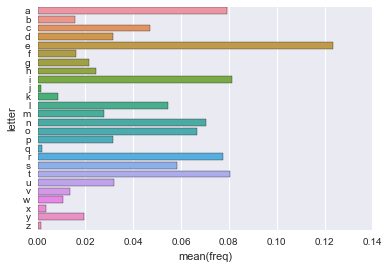

In [17]:
sns.barplot(y="letter", x="freq", data=letter_freq, order=alphabet, orient='h')
sns.despine(left=True, bottom=True)
sns.plt.show()

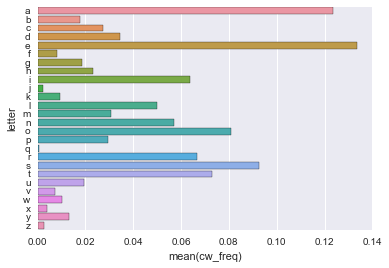

In [18]:
sns.barplot(y="letter", x="cw_freq", data=letter_freq, order=alphabet, orient='h')
sns.despine(left=True, bottom=True)
sns.plt.show()

In [28]:
cw['answer_length'] = cw['answer'].map(lambda x: len(x))
cw.head()

,title,clue,date,year,answer,unique,day,answer_count,answer_length
0,,"___ Nast, publisher of Vogue",December 16,2016,CONDE,False,Friday,3,5
1,,Baby,December 16,2016,SPOIL,False,Friday,4,5
2,,Voodoo doll action,December 16,2016,HEX,False,Friday,6,3
3,,"""Robin ___"" (old Irish ballad)",December 16,2016,ADAIR,False,Friday,4,5
4,,Bittersweet spread,December 16,2016,MARMALADE,False,Friday,1,9


In [31]:
top_words['word_length'] = top_words['Word'].map(lambda x: len(x))
top_words.head()

,Rank,Word,Part of speech,Frequency,Dispersion,word_length
0,1,the,a,22038615,0.98,3
1,2,be,v,12545825,0.97,2
2,3,and,c,10741073,0.99,3
3,4,of,i,10343885,0.97,2
4,5,a,a,10144200,0.98,1


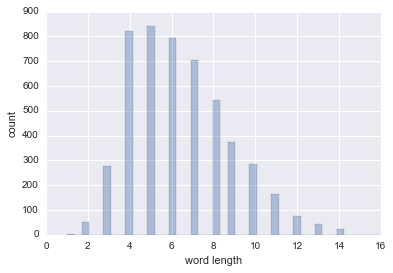

In [69]:
ax = sns.distplot(top_words['word_length'], kde=False)
plt.xlabel('word length')
plt.ylabel('count')
plt.show()

In [49]:
cw_top_df = pd.DataFrame({'word': cw_top_5000.index, 'length': cw_top_5000.index.map(lambda x: len(x)), 
              'freq': cw_top_5000.values})

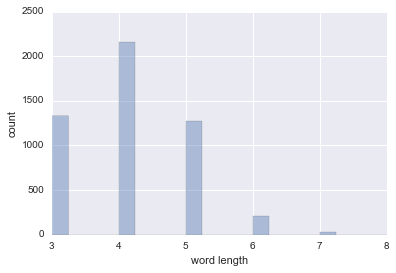

In [71]:
ax = sns.distplot(cw_top_df['length'], kde=False, bins=20)
plt.ylabel('count')
plt.xlabel('word length')
plt.show()

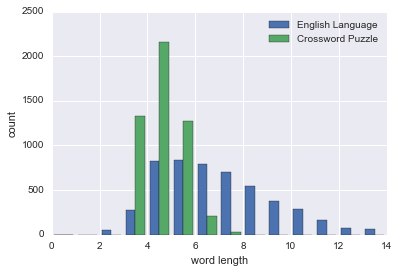

In [94]:
binsize = np.arange(0,15,1)

plt.hist([top_words['word_length'], cw_top_df['length']], histtype='bar', bins=binsize,
        align='mid', label=['English Language', 'Crossword Puzzle'])

plt.ylabel('count')
plt.xlabel('word length')
plt.legend()
plt.show()

In [92]:
binsize

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

ValueError: color kwarg must have one color per dataset

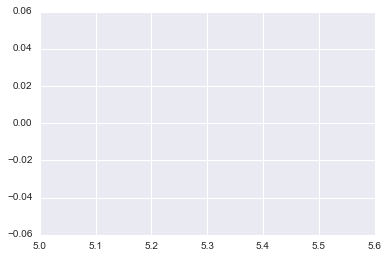

In [85]:
sns.distplot([top_words['word_length'], cw_top_df['length']], kde=False)
plt.ylabel('count')
plt.xlabel('word length')
plt.show()

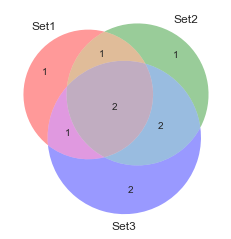

In [19]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
venn3(subsets = (1, 1, 1, 2, 1, 2, 2), set_labels = ('Set1', 'Set2', 'Set3'))
plt.show()

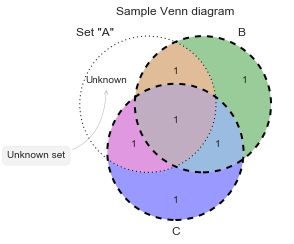

In [20]:
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

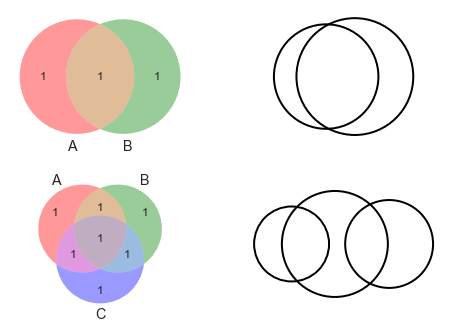

In [112]:
from matplotlib_venn import venn2, venn2_circles
figure, axes = plt.subplots(2, 2)
venn2(subsets={'10': 1, '01': 1, '11': 1}, set_labels = ('A', 'B'), ax=axes[0][0])
venn2_circles((1, 2, 3), ax=axes[0][1])
venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'), ax=axes[1][0])
venn3_circles({'001': 10, '100': 20, '010': 21, '110': 13, '011': 14}, ax=axes[1][1])
plt.show()

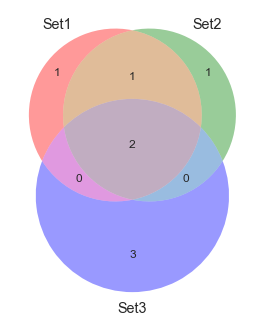

In [113]:
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G'])

venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()

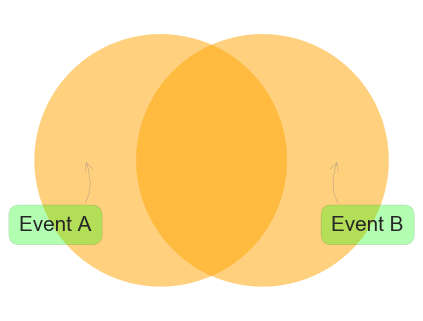

In [116]:
from matplotlib_venn import *
from matplotlib import pyplot as plt
v = venn2(subsets = {'10': 1, '01': 1, '11': 1}, set_labels = ('A', 'B'))
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('10').set_color('orange')
v.get_patch_by_id('01').set_alpha(0.5)
v.get_patch_by_id('01').set_color('orange')
v.get_patch_by_id('11').set_alpha(0.75)
v.get_patch_by_id('11').set_color('orange')
v.get_label_by_id('10').set_text('')
v.get_label_by_id('01').set_text('')
v.get_label_by_id('11').set_text('')
v.get_label_by_id('A').set_text('')
v.get_label_by_id('B').set_text('')
v.get_label_by_id('A').set_size(20)
v.get_label_by_id('B').set_size(20)
plt.annotate('Event A', xy = v.get_label_by_id('10').get_position(), xytext = (-30,-70), size = 'xx-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad=0.5', fc = 'lime', alpha = 0.3),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0.5', color = 'gray'))

plt.annotate('Event B', xy = v.get_label_by_id('01').get_position(), xytext = (30,-70), size = 'xx-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'lime', alpha = 0.3),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad = -0.5',color = 'gray'))

plt.show()